# Obsoleszenz Beispiel

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from 'C:\\Users\\Julian\\.conda\\envs\\test\\lib\\datetime.py'>
holidays 0.11.3.1
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\Julian\\.conda\\envs\\test\\lib\\os.py'>
locale <module 'locale' from 'C:\\Users\\Julian\\.conda\\envs\\test\\lib\\locale.py'>


In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

# Beispiel:

Der Desktop-Computer **Dell OptiPlex 3070 Tower** von Dell wird verwendet. Allerdings geht nach zwei Jahren die Festplatte kaputt. Nun muss zwischen den folgenden zwei Szenarien abgewägt werden:
- Szenario 1: Nur die Festplatte soll ersetzt werden und der Computer die restlichen zwei Jahre seiner erwarteten Lebenszeit mit der neuen Festplatte laufen
- Szenario 2: Der alte Computer wird entsorgt und stattdessen soll ein neuerer, schnellerer und ökologischerer Computer (der **Dell OptiPlex 7090 Tower**) gekauft werden, der weitere zwei Jahre läuft

## Product Carbon Footprint (PCF):

[PCF für den Dell OptiPlex 3070 Tower:](https://corporate.delltechnologies.com/asset/en-us/products/desktops-and-all-in-ones/technical-support/optiplex-3070-tower.pdf)

In [3]:
PCF_3070 = 579
use_3070 = 0.439*PCF_3070
transportation_3070 = 0.026*PCF_3070
EoL_3070 = 0.005*PCF_3070
manufacturing_3070 = 0.53*PCF_3070

[PCF für den Dell OptiPlex 7090 Tower:](https://corporate.delltechnologies.com/asset/en-us/products/desktops-and-all-in-ones/technical-support/optiplex-7090-tower-pcf-datasheet.pdf)

In [4]:
PCF_7090 = 454
use_7090 = 0.467*PCF_7090
transportation_7090 = 0.026*PCF_7090
EoL_7090 = 0.006*PCF_7090
manufacturing_7090 = 0.501*PCF_7090

### PCF für Szenario1:

Aus dem DataSheet des OptiPlex 3070 geht hervor, dass die Festplatte ca. 1,8% des PCF ausmacht. Deshalb wird angenommen, dass bei der Herstellung der Festplatte 1,8% des gesamten PCF entstehen. Da die gleiche Festplatte wie vorher eingebaut wird, ändert sich der Verbrauch im Vergleich zu vorher nicht und es werden lediglich die Kosten für die Nutzung der restlichen zwei Jahre Laufzeit berechnet. Es werden die kompletten Transportkosten angenommen, da diese unabhängig davon sind, ob ein komplett neuer Computer oder lediglich eine neue Festplatte verschickt wird. Nach vier Jahren muss zusätzlich zu der kaputten Festplatte der gesamte Computer entsorgt werden.

In [5]:
Faktoren = ['Herstellung', 'Nutzung', 'Transport', 'EoL']

dic_pcf_SSD = {'Faktor': Faktoren,
              'Kosten': [manufacturing_3070*0.018, use_3070*0.5, transportation_3070, EoL_3070*0.018 + EoL_3070]}
pcf_SSD = pd.DataFrame(dic_pcf_SSD)
pcf_SSD.set_index('Faktor', inplace=True)
scenario1 = pcf_SSD

### PCF für Szenario2:

In Szenario 2 wird ein neuer Computer angeschafft, weshalb die Entsorgungskosten für den ersten Computer anfallen. Außerdem ändern sich die Kosten für die Nutzung, da der neue Computer ökologischer ist. 

In [6]:
dic_pcf_7090 = {'Faktor': Faktoren,
              'Kosten': [manufacturing_7090, use_7090*0.5, transportation_7090, EoL_3070]}
pcf_7090 = pd.DataFrame(dic_pcf_7090)
pcf_7090.set_index('Faktor', inplace=True)
scenario2 = pcf_7090

### PCF für beide Szenarien:

In [7]:
pcf = pd.concat([scenario1, scenario2], axis=1)
pcf

Kosten   Kosten
Faktor                         
Herstellung    5.52366  227.454
Nutzung      127.09050  106.009
Transport     15.05400   11.804
EoL            2.94711    2.895

Text(0, 0.5, 'Treibhauseffekt [kg CO2-eq]')

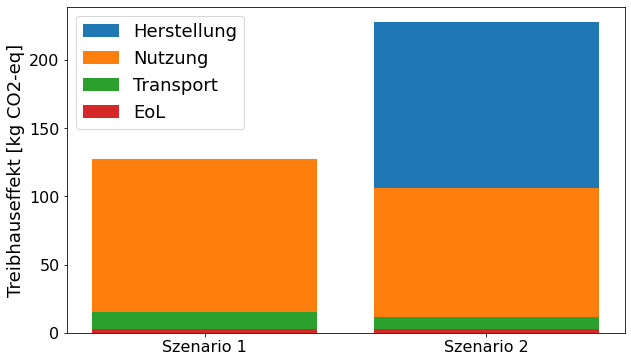

In [8]:
ind = ['Szenario 1', 'Szenario 2']
columns = pcf.index.values

for i in range(0, len(pcf)):
    plt.bar(ind, pcf.iloc[i], label=columns[i])

plt.legend(loc='best')
plt.ylabel('Treibhauseffekt [kg CO2-eq]')

## Kosten

### Kapitelgebundene Kosten

- neue Festplatte kaufen kostet 40€, der neue Computer kostet 890€
- neue Festplatte einbauen lassen kostet ca. 40€
- Versandkosten der Festplatte 9,5€ plus Transportversicherung von 6€. Beim Computer sind Versandkosten im Preis enthalten

In [9]:
kapitalgebundeneKosten = [['Investition', -105, -890],
                         ['Aufrüstungskosten', -40, 0],
                         ['Versandkosten', -9.5-6, 0]]
kapitalgebundeneKosten_df = pd.DataFrame(kapitalgebundeneKosten, columns = ['Kosten', 'Szenario 1', 'Szenario 2'])
kapitalgebundeneKosten_df.set_index('Kosten', inplace=True)
kapKosten = kapitalgebundeneKosten_df.sum()
kapitalgebundeneKosten_df

Szenario 1  Szenario 2
Kosten                                   
Investition            -105.0        -890
Aufrüstungskosten       -40.0           0
Versandkosten           -15.5           0

### Bedarfsgebundene Kosten

Der Jahresverbrauch für den OptiPlex 3070 wird mit 121,19 kWh und für den OptiPlex 7090 mit 101,45 kWh angegeben. Der aktuelle Preis für eine kWh beträgt ca. 35 Cent. 

In [10]:
bedarfsgebundeneKosten = [['Stromkosten', -(121.19*0.35), -(101.45*0.35)]]
bedarfsgebundeneKosten_df = pd.DataFrame(bedarfsgebundeneKosten, columns = ['Kosten', 'Szenario 1', 'Szenario 2'])
bedarfsgebundeneKosten_df.set_index('Kosten', inplace=True)
bedKosten = bedarfsgebundeneKosten_df.sum()
bedarfsgebundeneKosten_df

Szenario 1  Szenario 2
Kosten                             
Stromkosten    -42.4165    -35.5075

### Betriebsgebundene Kosten

In Szenario 2 wird ein neuerer und schnellerer Computer verwendet. Im Folgenden unterteilen wir das Szenario für die betriebsgebundenen Kosten wie folgt:
- Szenario 2.1: Durch den schnelleren Computer wird Arbeitszeit gewonnen, die als zusätzliche Produktivität angerechnet wird. Wir gehen davon aus, dass die Zeiteinsparung täglich bei 5 Minuten liegt, der Stundenlohn 30€ beträgt und das Jahr 250 Arbeitstage hat.
- Szenario 2.2: Wir berechnen den Umstand, dass der neue Computer schneller ist, nicht ein.

In [11]:
betriebsgebundeneKosten = [['Produktivitätssteigerung', 0, (5/60)*30*250, 0]]
betriebsgebundeneKosten_df = pd.DataFrame(betriebsgebundeneKosten, columns = ['Kosten', 'Szenario 1', 'Szenario 2.1', 'Szenario 2.2'])
betriebsgebundeneKosten_df.set_index('Kosten', inplace=True)
betKosten = betriebsgebundeneKosten_df.sum()
betriebsgebundeneKosten_df

Szenario 1  Szenario 2.1  Szenario 2.2
Kosten                                                          
Produktivitätssteigerung           0         625.0             0

### Sonstige Kosten

Annahme: Keine sonstigen Kosten.

In [12]:
sonstigeKosten = [['Sonstige Kosten', 0, 0]]
sonstigeKosten_df = pd.DataFrame(sonstigeKosten, columns = ['Kosten', 'Szenario 1', 'Szenario 2'])
sonstigeKosten_df.set_index('Kosten', inplace=True)
sonKosten = sonstigeKosten_df.sum()
sonstigeKosten_df

Szenario 1  Szenario 2
Kosten                                 
Sonstige Kosten           0           0

### Annuität ermitteln

In [13]:
p = 0.025 #Zinsfuß
q = 1+p   #Zinsfaktor
r = 1     #Preisänderungsfaktor
T = 2     #Betrachtungszeitraum
TN = 4    #Nutzungszeitraum

a = (q**T)*(q-1)/((q**T)-1) #Annuitätsfaktor

A = []    #Keine Ersatzbeschaffungen
n = T/TN

RW = kapKosten*(r**(n*TN))*(((n+1)*TN-T)/TN)*(1/(q**T))
ANK = (sum(A) + kapKosten - RW)*a
ANK.rename({'Szenario 2': 'Szenario 2.1'}, inplace=True) #Szenario 2 aufteilen
ANK.loc['Szenario 2.2'] = ANK[1]                         #Kapitelsgebundene Kosten in Szenario 2.1 und Szenario 2.2 identisch
print('Annuität der kapitalsgebundenen Kosten:')
print('    Szenario 1: ' + str(ANK[0]))
print('    Szenario 2.1: ' + str(ANK[1]))
print('    Szenario 2.2: ' + str(ANK[2]))

rv = 1.01 #jährliche Strompreiserhöhung
bv = (1-((rv/q)**T))/(q-rv)
ANV = bedKosten*a*bv
ANV.rename({'Szenario 2': 'Szenario 2.1'}, inplace=True) #Szenario 2 aufteilen
ANV.loc['Szenario 2.2'] = ANV[1]                         #Bedarfsgebundene Kosten in Szenario 2.1 und Szenario 2.2 identisch
print('Annuität der bedarfsgebundenen Kosten:')
print('    Szenario 1: ' + str(ANV[0]))
print('    Szenario 2.1: ' + str(ANV[1]))
print('    Szenario 2.2: ' + str(ANV[2]))

rb = 1.03 #Lohnsteigerung
bb = (1-((rb/q)**T))/(q-rb)
ANB = betKosten*a*bb
print('Annuität der betriebsgebundenen Kosten:')
print('    Szenario 1: ' + str(ANB[0]))
print('    Szenario 2.1: ' + str(ANB[1]))
print('    Szenario 2.2: ' + str(ANB[2]))

bs = 1
ANS = sonKosten * a * bs
ANS.rename({'Szenario 2': 'Szenario 2.1'}, inplace=True) #Szenario 2 aufteilen
ANS.loc['Szenario 2.2'] = ANS[1]                         #Sonstige Kosten in Szenario 2.1 und Szenario 2.2 identisch
print('Annuität der sonstigen Kosten:')
print('    Szenario 1: ' + str(ANS[0]))
print('    Szenario 2.1: ' + str(ANS[1]))
print('    Szenario 2.2: ' + str(ANS[2]))

Annuität der kapitalsgebundenen Kosten:
    Szenario 1: -4.012499999999987
    Szenario 2.1: -22.249999999999957
    Szenario 2.2: -22.249999999999957
Annuität der bedarfsgebundenen Kosten:
    Szenario 1: -42.62596419753073
    Szenario 2.1: -35.68284567901223
    Szenario 2.2: -35.68284567901223
Annuität der betriebsgebundenen Kosten:
    Szenario 1: 0.0
    Szenario 2.1: 634.2592592592368
    Szenario 2.2: 0.0
Annuität der sonstigen Kosten:
    Szenario 1: 0.0
    Szenario 2.1: 0.0
    Szenario 2.2: 0.0


Text(-57.93284567901219, 2, '-57.93 EUR/a')

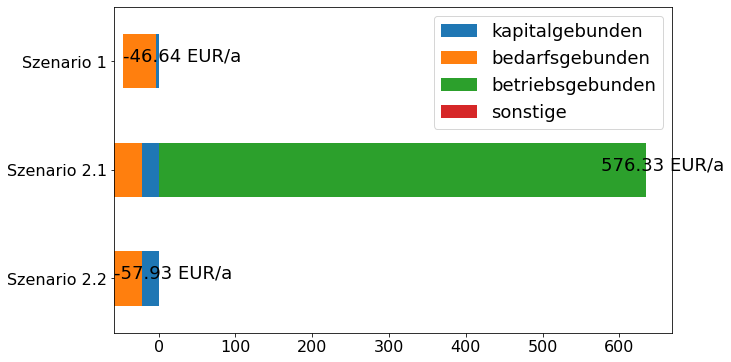

In [14]:
index = ['Szenario 1', 'Szenario 2.1', 'Szenario 2.2']

data = {'kapitalgebunden': ANK,
       'bedarfsgebunden': ANV,
       'betriebsgebunden': ANB,
       'sonstige': ANS} 

ann = pd.DataFrame(data=data,index=index)
ax = ann.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='upper right')
ann_scenario1 = ANK[0]+ANV[0]+ANB[0]+ANS[0]
ann_scenario21 = ANK[1]+ANV[1]+ANB[1]+ANS[1]
ann_scenario22 = ANK[2]+ANV[2]+ANB[2]+ANS[2]
ax.text(ann_scenario1,0,str(np.round(ann_scenario1,2))+' EUR/a')
ax.text(ann_scenario21,1,str(np.round(ann_scenario21,2))+' EUR/a')
ax.text(ann_scenario22,2,str(np.round(ann_scenario22,2))+' EUR/a')

In diesem Fall lohnt sich wirtschaftlich Szenario 2.1, weil die gewonnene Arbeitszeit hier einen extrem hohen Einfluss auf die Annuität hat. Wird die Arbeitszeit nicht berücksichtigt, gibt es kaum einen Unterschied zwischen beiden Szenarien. Im Gegensatz dazu ist in Szenario 1 der Treibhauseffekt wesentlich geringer als in Szenario 2. 